The dataset I chose covers the box office performaces of all Marvel movies. Here is the link of the dataset itself:

https://www.kaggle.com/datasets/jainaru/marvel-movies-box-office-data

The reason I selected this particular dataset is because of my lifelong passion for the Marvel Cinematic Universe, and interest in cinema in general. However, beyond my personal interest, this dataset is a rich source for exploring cinematic trends, calculating franchise profitability, and understanding audience engagement. Now let's import all the necessary libraries, get the dataset I'm talking about, and look at the first few lines of it.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import kagglehub

In [53]:
path = kagglehub.dataset_download("jainaru/marvel-movies-box-office-data")

for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_path = os.path.join(path, file)
        break

df = pd.read_csv(csv_path)

In [54]:
df.head()

,movie,category,year,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend
0,Ant-Man,Ant-Man,2015,518,398%,83%,85%,-2%,130.0,180,338,57.0,24.0,-58%,31.8,34.70%,65.30%,43.80%
1,Ant-Man & The Wasp,Ant-Man,2018,623,479%,87%,80%,7%,130.0,216,406,75.8,29.0,-62%,35.0,34.70%,65.20%,58.30%
2,Avengers: Age of Ultron,Avengers,2015,1395,382%,76%,82%,-6%,365.0,459,936,191.0,77.0,-60%,41.7,32.90%,67.10%,52.30%
3,Avengers: End Game,Avengers,2019,2797,699%,94%,90%,4%,400.0,858,1939,357.0,147.0,-59%,41.6,30.70%,69.30%,89.30%
4,Avengers: Infinity War,Avengers,2018,2048,683%,85%,91%,-6%,300.0,678,1369,257.0,114.0,-56%,38.0,33.10%,66.80%,85.70%


Now as we can see, this dataset has a huge problem in it, as several important columns have the percentage sign (%) in them, meaning the values are stored as strings. To fix this, I'll perform a cleaning step, and strip the % symbol from these columns and convert the remaining values to numerical formats.

In [55]:
percentage_columns = [
    '% budget recovered', 
    'critics % score', 
    'audience % score', 
    'audience vs critics % deviance', 
    '% gross from opening weekend',
    '% gross from domestic',
    '% gross from international',
    '% budget opening weekend',
    '1st vs 2nd weekend drop off'
]

for c in percentage_columns:
    if df[c].dtype == 'object':
        df[c] = df[c].str.replace('%', '', regex=False)

df[c] = pd.to_numeric(df[c], errors='coerce') / 100

In [56]:
df.head()

,movie,category,year,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend
0,Ant-Man,Ant-Man,2015,518,398,83,85,-2,130.0,180,338,57.0,24.0,-0.58,31.8,34.70,65.30,43.80
1,Ant-Man & The Wasp,Ant-Man,2018,623,479,87,80,7,130.0,216,406,75.8,29.0,-0.62,35.0,34.70,65.20,58.30
2,Avengers: Age of Ultron,Avengers,2015,1395,382,76,82,-6,365.0,459,936,191.0,77.0,-0.60,41.7,32.90,67.10,52.30
3,Avengers: End Game,Avengers,2019,2797,699,94,90,4,400.0,858,1939,357.0,147.0,-0.59,41.6,30.70,69.30,89.30
4,Avengers: Infinity War,Avengers,2018,2048,683,85,91,-6,300.0,678,1369,257.0,114.0,-0.56,38.0,33.10,66.80,85.70


As we can see, the problem is solved, so we can go on and build predictive models. For example, we can forecast a film's ultimate worldwide gross based on its early performance. we can train a model to predict total revenue using features like the opening weekend, first and second weekend drop off, the budget, and the audience score. But at first, let's visualise the dataset, and make a couple of charts with matplotlib.

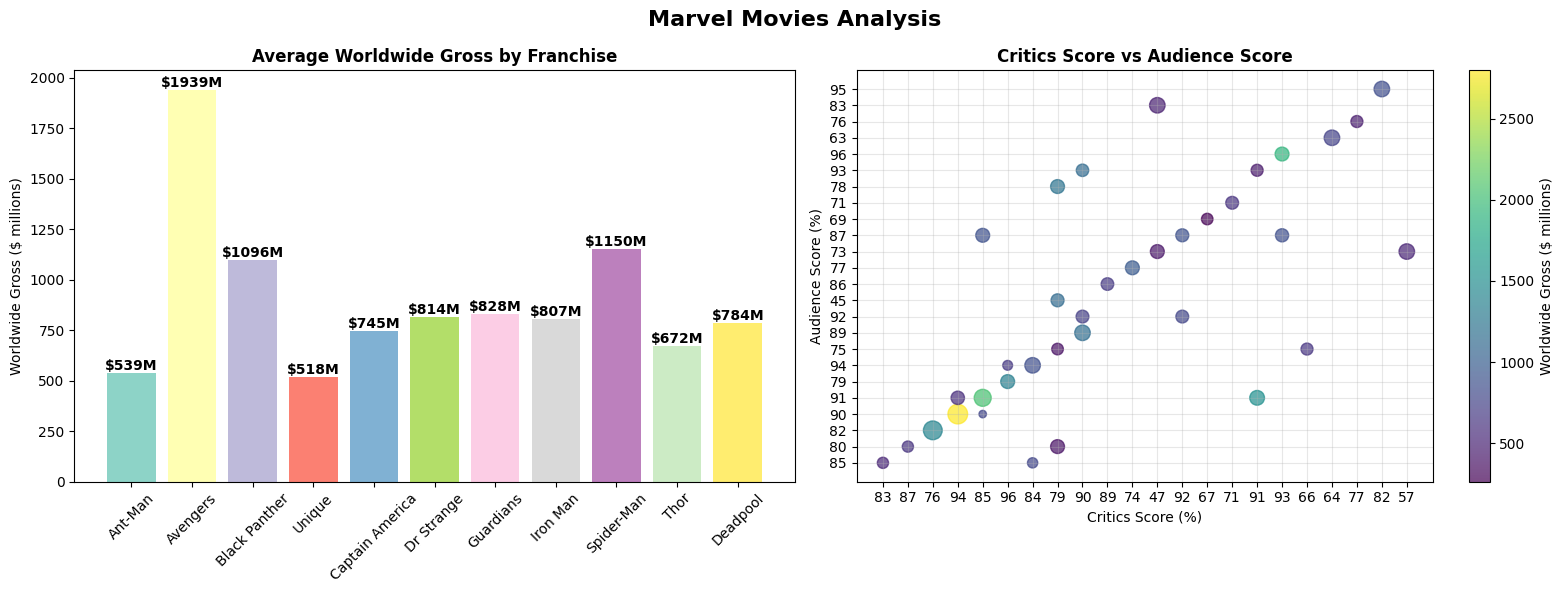

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Marvel Movies Analysis', fontsize=16, fontweight='bold')

categories = df['category'].unique()
category_gross = [df[df['category'] == cat]['worldwide gross ($m)'].mean() for cat in categories]

colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
bars = ax1.bar(categories, category_gross, color=colors)
ax1.set_title('Average Worldwide Gross by Franchise', fontweight='bold')
ax1.set_ylabel('Worldwide Gross ($ millions)')
ax1.tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.0f}M', ha='center', va='bottom', fontweight='bold')

scatter = ax2.scatter(df['critics % score'], df['audience % score'], 
                     c=df['worldwide gross ($m)'], s=df['budget']/2, 
                     alpha=0.7, cmap='viridis')
ax2.set_title('Critics Score vs Audience Score', fontweight='bold')
ax2.set_xlabel('Critics Score (%)')
ax2.set_ylabel('Audience Score (%)')
ax2.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Worldwide Gross ($ millions)')

plt.tight_layout()
plt.show()

The first chart in here shows the average worldwide gross in millions by each franchise. Meaning that the entire Cinematic Universe consists of some smaller franchises, and we can see the popularity of each sub-franchise, and movie series.
And the second one shows how good movie is based on the critics and the audiences, by comparing how much their opinions align.

Alright, now let's build our model. And for doing that we'll need a library called sklearn, so let's import it.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

Now let's define our X and y. I'll choose the category (X) as the year, budget, opening weekend, critics score, audience score and the first vs second weekend drop off to predict the target (y) which will be the worldwide gross.

In [59]:
features = ["category", "year", "budget", "opening weekend ($m)", "critics % score", "1st vs 2nd weekend drop off"]
target = "worldwide gross ($m)"
X = df[features]
y = df[target]

Now, as long as our dataset has a mix of categorical data and numeric data in it, and linear regression needs everything to be numeric, I'll convert categorical columns into the numeric format.

In [60]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), ["category"])
    ],
    remainder="passthrough"
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", LinearRegression())
])

Now let's split the data to prevent the model from "cheating" by testing it on the data it has never seen.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now let's train and evaluate our model

In [62]:
model.fit(X_train, y_train)

preds = model.predict(X_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)

Ok, now let's visualize it with matplotlib

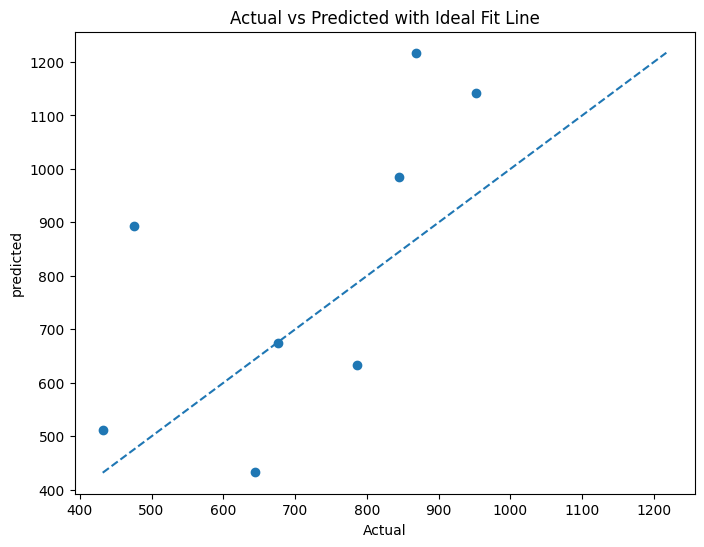

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds)
min_val = min(min(y_test), min(preds))
max_val = max(max(y_test), max(preds))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Actual vs Predicted with Ideal Fit Line")
plt.show()

As a conclusion we can say that this model suggests a positive correlation between the selected features and worldwide gross, as some points align somewhat near the dashed line. But there is also a noticable deviation, meaning our linear regression model captures a general upward trend but lacks precision. The spread of points indicates prediction error, suggesting that the model only partially explains the variability in movie revenues. However, despite its flaws, I think this project successfully demonstrates a complete machine learning workflow, and may serve as a great introduction to our upcoming projects.